In [2]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [3]:
data_root = '../../dataset/anns/original'  # contains refcoco, refcoco+, refcocog, refgta
dataset = 'refcocog'
splitBy = 'google'

# contains image
if 'refcoco' in dataset:
    ## MSCOCO image path
    image_root = '../../dataset/coco_image/train2014'
else:
    ## GTA image path
    image_root = '../../dataset/gta_image/gtav_cv_mod_data/'
refer = REFER(data_root, image_root, dataset, splitBy)

loading dataset refcocog into memory...
../../dataset/anns/original/ref2/refcocog
creating index...
index created.
DONE (t=6.83s)


# Stats about the Dataset

In [4]:
# print stats about the given dataset
print ('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print ('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print ('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
elif dataset == 'refgta':
    splits = ['train','val','test']
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print ('%s refs are in split [%s].' % (len(ref_ids), split))
    
print('\nSents info:')
all_sent_num = 0
sent_length = 0
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    sent_num = 0
    images = []
    for ref_id in ref_ids:
        ref = refer.Refs[ref_id]
        sent_num += len(ref['sent_ids'])
        images.append(ref['file_name'])
        sent_length += sum([len(sent['tokens']) for sent in refer.Refs[ref_id]['sentences']])
    all_sent_num += sent_num
    print ('%s ref expressions | %s images are in split [%s].' % (sent_num, len(list(set(images))), split))
print ('mean length is %s .' % (sent_length/all_sent_num))

dataset [refcocog_google] contains: 
95010 expressions for 49822 refs in 25799 images.

Among them:
44822 refs are in split [train].
5000 refs are in split [val].

Sents info:
85474 ref expressions | 44820 images are in split [train].
9536 ref expressions | 5000 images are in split [val].
mean length is 8.464477423429113 .


# Show Refered Object and its Expressions

train
ref_id [13516] (ann_id [505072])
1. a monk that is third in line
2. the monk right behind the monk holding the umbrella


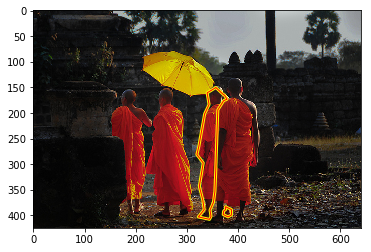

In [5]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = ref_ids[np.random.randint(0, len(ref_ids))]
ref = refer.Refs[ref_id]
print(ref['split'])
print ('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
if dataset in ['refcoco','refcoco+','refcocog']:
    plt.figure()
    refer.showRef(ref, seg_box='seg')
    plt.show()

1. a monk that is third in line
2. the monk right behind the monk holding the umbrella


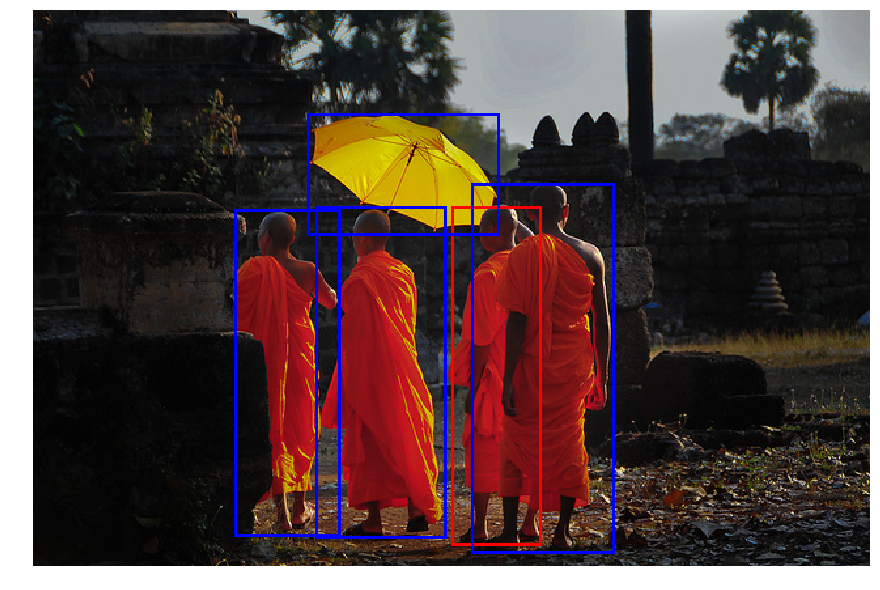

In [6]:
# or show the bounding box of the referred object
plt.figure(figsize=(15,12))
refer.showRef(ref, seg_box='box')
plt.axis('off')
plt.show()

In [8]:
# let's look at the details of each ref

if dataset in ['refcoco','refcoco+','refcocog']:
    for i,sent in enumerate(ref['sentences']):
        print ('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))
elif dataset in ['refgta']:
    rank = refer.get_rank1(ref)
    for i,sent in enumerate(ref['sentences']):
        sent_info = sent['info']
        times = sorted([one_info['time'] for one_info in sent_info])[1:-1]
        time_mean = np.mean(times)
        SD = np.sqrt(np.var(times)*len(times)/(len(times)-1))
        SE = SD/np.sqrt(len(times))
        print ('rank : [%s], sent_id[%s]: %s' % (str(rank[i]), sent['sent_id'], sent['sent']))
        print('{0:.2f}±{1:.2f}'.format(time_mean/1000,SE/1000))

sent_id[19817]: a monk that is third in line
sent_id[19818]: the monk right behind the monk holding the umbrella
